In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [3]:
df = spark.read.csv('FARS.csv',header=True,inferSchema=True)

In [5]:
df.show()

+-----+-------+------+--------+--------+----+-------+-------+--------+--------+------+--------+-----+-----+----+----+----+-------+-----+-------+-------+---------+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----+----+------+--------+
|STATE|ST_CASE|FATALS|A_CRAINJ|A_REGION|A_RU|A_INTER|A_RELRD|A_INTSEC|A_ROADFC|A_JUNC|A_MANCOL|A_TOD|A_DOW|A_CT|A_LT|A_MC|A_SPCRA|A_PED|A_PED_F|A_PEDAL|A_PEDAL_F|A_ROLL|A_POLPUR|A_POSBAC|A_D15_19|A_D16_19|A_D15_20|A_D16_20|A_D65PLS|A_D21_24|A_D16_24|A_RD|A_HR|A_DIST|A_DROWSY|
+-----+-------+------+--------+--------+----+-------+-------+--------+--------+------+--------+-----+-----+----+----+----+-------+-----+-------+-------+---------+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----+----+------+--------+
|    1|  10001|     1|       1|       4|   1|      2|      4|       2|       3|     2|       1|    2|    1|   1|   2|   2|      2|    2|      2|      2|        2|     2|

In [6]:
df.printSchema()
print(df.head(32540))

root
 |-- STATE: integer (nullable = true)
 |-- ST_CASE: integer (nullable = true)
 |-- FATALS: integer (nullable = true)
 |-- A_CRAINJ: integer (nullable = true)
 |-- A_REGION: integer (nullable = true)
 |-- A_RU: integer (nullable = true)
 |-- A_INTER: integer (nullable = true)
 |-- A_RELRD: integer (nullable = true)
 |-- A_INTSEC: integer (nullable = true)
 |-- A_ROADFC: integer (nullable = true)
 |-- A_JUNC: integer (nullable = true)
 |-- A_MANCOL: integer (nullable = true)
 |-- A_TOD: integer (nullable = true)
 |-- A_DOW: integer (nullable = true)
 |-- A_CT: integer (nullable = true)
 |-- A_LT: integer (nullable = true)
 |-- A_MC: integer (nullable = true)
 |-- A_SPCRA: integer (nullable = true)
 |-- A_PED: integer (nullable = true)
 |-- A_PED_F: integer (nullable = true)
 |-- A_PEDAL: integer (nullable = true)
 |-- A_PEDAL_F: integer (nullable = true)
 |-- A_ROLL: integer (nullable = true)
 |-- A_POLPUR: integer (nullable = true)
 |-- A_POSBAC: integer (nullable = true)
 |-- A_D1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
df.describe().show()

+-------+------------------+------------------+------------------+--------+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+
|summary|             STATE|           ST_CASE|            FATALS|A_CRAINJ|         A_REGION|              A_RU|           A_INTER|           A_RELRD|           A_INTSEC|          A_ROADFC|            A_JUNC|          A_MANCOL|             A_TOD|             A_DOW|              A_CT|               A_

In [8]:
df.groupBy('A_CRAINJ').mean().show()

+--------+------------------+------------------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------------+-----------------+-----------------+------------------+
|A_CRAINJ|        avg(STATE)|      avg(ST_CASE)|       avg(FATALS)|avg(A_CRAINJ)|    avg(A_REGION)|        avg(A_RU)|      avg(A_INTER)|     avg(A_RELRD)|     avg(A_INTSEC)|     avg(A_ROADFC)|      avg(A_JUNC)|     avg(A_MANCOL)|        avg(A_TOD)|        avg(A_DOW)|         avg(A_CT)|         avg(A_LT)|         avg(A_

In [2]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [4]:
df = spark.read.csv('FARS.csv',header=True,inferSchema=True)

In [16]:
df.crosstab('A_TOD', 'A_CRAINJ').show()

+--------------+-----+
|A_TOD_A_CRAINJ|    1|
+--------------+-----+
|             2|16635|
|             1|15656|
|             3|  248|
+--------------+-----+



In [6]:
df.crosstab('A_POSBAC', 'A_CRAINJ').show()

+-----------------+-----+
|A_POSBAC_A_CRAINJ|    1|
+-----------------+-----+
|                2| 7832|
|                1| 7787|
|                3|16920|
+-----------------+-----+



In [7]:
df.crosstab('STATE', 'A_CRAINJ').show()

+--------------+----+
|STATE_A_CRAINJ|   1|
+--------------+----+
|             5| 491|
|            10| 127|
|            56| 129|
|            42|1102|
|            24| 479|
|            37|1275|
|            25| 328|
|            20| 322|
|            46| 116|
|            29| 803|
|             1| 784|
|             6|3123|
|            28| 604|
|            38| 111|
|            21| 694|
|            33| 103|
|             9| 257|
|            53| 499|
|            13|1329|
|            41| 411|
+--------------+----+
only showing top 20 rows



In [8]:
df.crosstab('A_REGION', 'A_CRAINJ').show()

+-----------------+----+
|A_REGION_A_CRAINJ|   1|
+-----------------+----+
|                5|4489|
|               10|1372|
|                1| 666|
|                6|5351|
|                9|4019|
|                2|2941|
|                7|2116|
|                3|3556|
|                8|1418|
|                4|6611|
+-----------------+----+



In [10]:
df.crosstab('A_RU', 'A_CRAINJ').show()

+-------------+-----+
|A_RU_A_CRAINJ|    1|
+-------------+-----+
|            2|15789|
|            1|15725|
|            3| 1025|
+-------------+-----+



In [11]:
df.crosstab('A_RELRD', 'A_CRAINJ').show()

+----------------+-----+
|A_RELRD_A_CRAINJ|    1|
+----------------+-----+
|               1|19562|
|               6|   60|
|               2|  479|
|               3| 1243|
|               4|11195|
+----------------+-----+



In [12]:
df.crosstab('A_INTSEC', 'A_CRAINJ').show()

+-----------------+-----+
|A_INTSEC_A_CRAINJ|    1|
+-----------------+-----+
|                2|24551|
|                1| 7926|
|                3|   62|
+-----------------+-----+



In [13]:
df.crosstab('A_ROADFC', 'A_CRAINJ').show()

+-----------------+----+
|A_ROADFC_A_CRAINJ|   1|
+-----------------+----+
|                5|5316|
|                1|3947|
|                6|5051|
|                2|1907|
|                7|1107|
|                3|9100|
|                4|6111|
+-----------------+----+



In [14]:
df.crosstab('A_JUNC', 'A_CRAINJ').show()

+---------------+-----+
|A_JUNC_A_CRAINJ|    1|
+---------------+-----+
|              2|22161|
|              4|   62|
|              1| 7926|
|              3| 2390|
+---------------+-----+



In [15]:
df.crosstab('A_MANCOL', 'A_CRAINJ').show()

+-----------------+-----+
|A_MANCOL_A_CRAINJ|    1|
+-----------------+-----+
|                5|  841|
|                1|20129|
|                6|  120|
|                2| 2223|
|                7|   76|
|                3| 3305|
|                4| 5845|
+-----------------+-----+



In [17]:
df.crosstab('A_DOW', 'A_CRAINJ').show()

+--------------+-----+
|A_DOW_A_CRAINJ|    1|
+--------------+-----+
|             2|13283|
|             1|19200|
|             3|   56|
+--------------+-----+



In [18]:
df.crosstab('A_CT', 'A_CRAINJ').show()

+-------------+-----+
|A_CT_A_CRAINJ|    1|
+-------------+-----+
|            2|11434|
|            1|18905|
|            3| 2200|
+-------------+-----+



In [19]:
df.crosstab('A_LT', 'A_CRAINJ').show()

+-------------+-----+
|A_LT_A_CRAINJ|    1|
+-------------+-----+
|            2|28917|
|            1| 3622|
+-------------+-----+



In [20]:
df.crosstab('A_MC', 'A_CRAINJ').show()

+-------------+-----+
|A_MC_A_CRAINJ|    1|
+-------------+-----+
|            2|27595|
|            1| 4944|
+-------------+-----+



In [21]:
df.crosstab('A_SPCRA', 'A_CRAINJ').show()

+----------------+-----+
|A_SPCRA_A_CRAINJ|    1|
+----------------+-----+
|               2|23833|
|               1| 8706|
+----------------+-----+



In [22]:
df.crosstab('A_PED', 'A_CRAINJ').show()

+--------------+-----+
|A_PED_A_CRAINJ|    1|
+--------------+-----+
|             2|27072|
|             1| 5467|
+--------------+-----+



In [23]:
df.crosstab('A_PEDAL', 'A_CRAINJ').show()

+----------------+-----+
|A_PEDAL_A_CRAINJ|    1|
+----------------+-----+
|               2|31708|
|               1|  831|
+----------------+-----+



In [24]:
df.crosstab('A_ROLL', 'A_CRAINJ').show()

+---------------+-----+
|A_ROLL_A_CRAINJ|    1|
+---------------+-----+
|              2|24683|
|              1| 7856|
+---------------+-----+



In [25]:
df.crosstab('A_HR', 'A_CRAINJ').show()

+-------------+-----+
|A_HR_A_CRAINJ|    1|
+-------------+-----+
|            2|30776|
|            1| 1763|
+-------------+-----+



In [26]:
df.crosstab('A_DIST', 'A_CRAINJ').show()

+---------------+-----+
|A_DIST_A_CRAINJ|    1|
+---------------+-----+
|              2|29297|
|              1| 3242|
+---------------+-----+



In [27]:
df.crosstab('A_D16_24', 'A_CRAINJ').show()

+-----------------+-----+
|A_D16_24_A_CRAINJ|    1|
+-----------------+-----+
|                2|23861|
|                1| 8678|
+-----------------+-----+



In [28]:
df.crosstab('A_POLPUR', 'A_CRAINJ').show()

+-----------------+-----+
|A_POLPUR_A_CRAINJ|    1|
+-----------------+-----+
|                2|32228|
|                1|  311|
+-----------------+-----+



In [29]:
df.crosstab('A_D65PLS', 'A_CRAINJ').show()


+-----------------+-----+
|A_D65PLS_A_CRAINJ|    1|
+-----------------+-----+
|                2|26429|
|                1| 6110|
+-----------------+-----+



In [30]:
df.crosstab('A_RD', 'A_CRAINJ').show()

+-------------+-----+
|A_RD_A_CRAINJ|    1|
+-------------+-----+
|            2|15524|
|            1|17015|
+-------------+-----+



In [31]:
df.crosstab('A_DROWSY', 'A_CRAINJ').show()

+-----------------+-----+
|A_DROWSY_A_CRAINJ|    1|
+-----------------+-----+
|                2|31796|
|                1|  743|
+-----------------+-----+



In [33]:
# Let's visually inspect the data. You may notice some nulls in the marital and balance column. 
df.show()

# Let's see how many rows of data we originally have.
print("Total data points:", df.count())

+-----+-------+------+--------+--------+----+-------+-------+--------+--------+------+--------+-----+-----+----+----+----+-------+-----+-------+-------+---------+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----+----+------+--------+
|STATE|ST_CASE|FATALS|A_CRAINJ|A_REGION|A_RU|A_INTER|A_RELRD|A_INTSEC|A_ROADFC|A_JUNC|A_MANCOL|A_TOD|A_DOW|A_CT|A_LT|A_MC|A_SPCRA|A_PED|A_PED_F|A_PEDAL|A_PEDAL_F|A_ROLL|A_POLPUR|A_POSBAC|A_D15_19|A_D16_19|A_D15_20|A_D16_20|A_D65PLS|A_D21_24|A_D16_24|A_RD|A_HR|A_DIST|A_DROWSY|
+-----+-------+------+--------+--------+----+-------+-------+--------+--------+------+--------+-----+-----+----+----+----+-------+-----+-------+-------+---------+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----+----+------+--------+
|    1|  10001|     1|       1|       4|   1|      2|      4|       2|       3|     2|       1|    2|    1|   1|   2|   2|      2|    2|      2|      2|        2|     2|

In [35]:
dropped_df = df.na.drop()
dropped_df.show()
print("Total data points:", dropped_df.count())

+-----+-------+------+--------+--------+----+-------+-------+--------+--------+------+--------+-----+-----+----+----+----+-------+-----+-------+-------+---------+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----+----+------+--------+
|STATE|ST_CASE|FATALS|A_CRAINJ|A_REGION|A_RU|A_INTER|A_RELRD|A_INTSEC|A_ROADFC|A_JUNC|A_MANCOL|A_TOD|A_DOW|A_CT|A_LT|A_MC|A_SPCRA|A_PED|A_PED_F|A_PEDAL|A_PEDAL_F|A_ROLL|A_POLPUR|A_POSBAC|A_D15_19|A_D16_19|A_D15_20|A_D16_20|A_D65PLS|A_D21_24|A_D16_24|A_RD|A_HR|A_DIST|A_DROWSY|
+-----+-------+------+--------+--------+----+-------+-------+--------+--------+------+--------+-----+-----+----+----+----+-------+-----+-------+-------+---------+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----+----+------+--------+
|    1|  10001|     1|       1|       4|   1|      2|      4|       2|       3|     2|       1|    2|    1|   1|   2|   2|      2|    2|      2|      2|        2|     2|

In [36]:
missing_field_df = df.na.drop()
missing_field_df.show()
print("Total data points:", missing_field_df.count())

+-----+-------+------+--------+--------+----+-------+-------+--------+--------+------+--------+-----+-----+----+----+----+-------+-----+-------+-------+---------+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----+----+------+--------+
|STATE|ST_CASE|FATALS|A_CRAINJ|A_REGION|A_RU|A_INTER|A_RELRD|A_INTSEC|A_ROADFC|A_JUNC|A_MANCOL|A_TOD|A_DOW|A_CT|A_LT|A_MC|A_SPCRA|A_PED|A_PED_F|A_PEDAL|A_PEDAL_F|A_ROLL|A_POLPUR|A_POSBAC|A_D15_19|A_D16_19|A_D15_20|A_D16_20|A_D65PLS|A_D21_24|A_D16_24|A_RD|A_HR|A_DIST|A_DROWSY|
+-----+-------+------+--------+--------+----+-------+-------+--------+--------+------+--------+-----+-----+----+----+----+-------+-----+-------+-------+---------+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----+----+------+--------+
|    1|  10001|     1|       1|       4|   1|      2|      4|       2|       3|     2|       1|    2|    1|   1|   2|   2|      2|    2|      2|      2|        2|     2|

In [37]:
import pandas as pd
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
STATE,32539,27.483973078459695,16.283738284581872,1,56
ST_CASE,32539,275541.38784228155,162761.0682601226,10001,560130
FATALS,32539,1.0905375088355511,0.3647642225760351,1,10
A_CRAINJ,32539,1.0,0.0,1,1
A_REGION,32539,5.355358185561941,2.345686109593239,1,10
A_RU,32539,1.548234426380651,0.5573906257396272,1,3
A_INTER,32539,1.9127201204708197,0.3843280744173301,1,3
A_RELRD,32539,2.132487169243062,1.4239360319266625,1,6
A_INTSEC,32539,1.7583207842896216,0.43253547099272727,1,3


In [2]:
df1= spark.read.csv('FARS2.csv',header=True,inferSchema=True)
df2= spark.read.csv('Factor.csv',header=True,inferSchema=True)
df2.show()

+-----+-------+------+-------+
|STATE|ST_CASE|VEH_NO|MFACTOR|
+-----+-------+------+-------+
|    1|  10001|     1|      0|
|    1|  10002|     1|      0|
|    1|  10003|     1|      0|
|    1|  10004|     1|      0|
|    1|  10005|     1|      0|
|    1|  10005|     2|      0|
|    1|  10006|     1|      0|
|    1|  10007|     1|      0|
|    1|  10008|     1|      0|
|    1|  10009|     1|      0|
|    1|  10010|     1|      0|
|    1|  10010|     2|      0|
|    1|  10011|     1|      0|
|    1|  10011|     2|      0|
|    1|  10012|     1|      0|
|    1|  10012|     2|      0|
|    1|  10012|     3|      0|
|    1|  10013|     1|      0|
|    1|  10014|     1|      0|
|    1|  10015|     1|      0|
+-----+-------+------+-------+
only showing top 20 rows



In [3]:
df2=df1.join(df2, ['ST_CASE'])

In [4]:
df2.select('ST_CASE','FATALS','A_CRAINJ','A_RU','A_REGION','A_INTER','A_RELRD','A_INTSEC','A_ROADFC','A_MANCOL','A_TOD','A_JUNC','A_DOW','A_CT','A_MC',
           'A_LT','A_SPCRA','A_PED','A_ROLL','A_POLPUR','A_POSBAC','A_D15_20','A_D65PLS','A_RD','A_HR','A_DIST','A_DROWSY','MFACTOR')

DataFrame[ST_CASE: int, FATALS: int, A_CRAINJ: int, A_RU: int, A_REGION: int, A_INTER: int, A_RELRD: int, A_INTSEC: int, A_ROADFC: int, A_MANCOL: int, A_TOD: int, A_JUNC: int, A_DOW: int, A_CT: int, A_MC: int, A_LT: int, A_SPCRA: int, A_PED: int, A_ROLL: int, A_POLPUR: int, A_POSBAC: int, A_D15_20: int, A_D65PLS: int, A_RD: int, A_HR: int, A_DIST: int, A_DROWSY: int, MFACTOR: int]

In [5]:
# Import pandas.
import pandas as pd

# Take the first five rows of data, and visualise.
pd.DataFrame(df2.take(5), columns=df2.columns)

,ST_CASE,STATE,FATALS,A_CRAINJ,A_REGION,A_RU,A_INTER,A_RELRD,A_INTSEC,A_ROADFC,...,A_D65PLS,A_D21_24,A_D16_24,A_RD,A_HR,A_DIST,A_DROWSY,STATE,VEH_NO,MFACTOR
0,10001,1,1,1,4,1,2,4,2,3,...,1,2,2,1,2,2,2,1,1,0
1,10002,1,1,1,4,1,1,3,2,1,...,2,2,2,1,2,2,2,1,1,0
2,10003,1,1,1,4,1,2,4,2,3,...,2,2,2,1,2,2,2,1,1,0
3,10004,1,1,1,4,1,2,4,2,4,...,2,2,2,1,2,2,2,1,1,0
4,10005,1,1,1,4,2,2,1,1,3,...,2,1,1,2,2,2,2,1,2,0


In [6]:
pd.DataFrame(df2.take(5), columns=df2.columns).transpose()

,0,1,2,3,4
ST_CASE,10001,10002,10003,10004,10005
STATE,1,1,1,1,1
FATALS,1,1,1,1,1
A_CRAINJ,1,1,1,1,1
A_REGION,4,4,4,4,4
A_RU,1,1,1,1,2
A_INTER,2,1,2,2,2
A_RELRD,4,3,4,4,1
A_INTSEC,2,2,2,2,1
A_ROADFC,3,1,3,4,3


In [7]:
# Import the relevant packages.
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)
# First create a string indexer which converts every string into a number, such as male = 0 and female = 1.
# A number will be assigned to every category in the column.
A_RU_indexer = StringIndexer(inputCol='A_RU',outputCol='A_RUIndex')
A_REGION_indexer = StringIndexer(inputCol='A_REGION',outputCol='A_REGIONIndex')
A_INTER_indexer = StringIndexer(inputCol='A_INTER',outputCol='A_INTERIndex')
ARELRD_indexer = StringIndexer(inputCol='A_RELRD',outputCol='A_RELRDIndex')
A_INTSEC_indexer = StringIndexer(inputCol='A_INTSEC',outputCol='A_INTSECIndex')
A_MANCOL_indexer = StringIndexer(inputCol='A_MANCOL',outputCol='A_MANCOLIndex')
A_TOD_indexer = StringIndexer(inputCol='A_TOD',outputCol='A_TODIndex')
A_JUNC_indexer = StringIndexer(inputCol='A_JUNC',outputCol='A_JUNCIndex')
A_DOW_indexer = StringIndexer(inputCol='A_DOW',outputCol='A_DOWIndex')
A_CT_indexer = StringIndexer(inputCol='A_CT',outputCol='A_CTIndex')
A_MC_indexer = StringIndexer(inputCol='A_MC',outputCol='A_MCIndex')
A_LT_indexer = StringIndexer(inputCol='A_LT',outputCol='A_LTIndex')
A_SPCRA_indexer = StringIndexer(inputCol='A_SPCRA',outputCol='A_SPCRAIndex')
A_PED_indexer = StringIndexer(inputCol='A_PED',outputCol='A_PEDIndex')
A_POLPUR_indexer = StringIndexer(inputCol='A_POLPUR',outputCol='A_POLPURIndex')
A_POSBAC_indexer = StringIndexer(inputCol='A_POSBAC',outputCol='A_POSBACIndex')
A_D15_20_indexer = StringIndexer(inputCol='A_D15_20',outputCol='A_D15_20Index')
A_D65PLS_indexer = StringIndexer(inputCol='A_D65PLS',outputCol='A_D65PLSIndex')
A_RD_indexer = StringIndexer(inputCol='A_RD',outputCol='A_RDIndex')
A_HR_indexer = StringIndexer(inputCol='A_HR',outputCol='A_HRIndex')
A_DIST_indexer = StringIndexer(inputCol='A_DIST',outputCol='A_DISTIndex')
A_DROWSY_indexer = StringIndexer(inputCol='A_DROWSY',outputCol='A_DROWSYIndex')
MFACTOR_indexer = StringIndexer(inputCol='MFACTOR',outputCol='MFACTORIndex')
A_CRAINJ_indexer = StringIndexer(inputCol='A_CRAINJ',outputCol='label')
# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# Multiple columns are collapsed into one. 
# This makes it easier to process when you have multiple classes.

A_RU_encoder = OneHotEncoder(inputCol='A_RUIndex',outputCol='A_RUVec')
A_REGION_encoder = OneHotEncoder(inputCol='A_REGIONIndex',outputCol='REGIONVec')
A_INTER_encoder = OneHotEncoder(inputCol='A_INTERIndex',outputCol='INTERVec')
ARELRD_encoder = OneHotEncoder(inputCol='A_RELRDIndex',outputCol='RELRDVec')
A_INTSEC_encoder = OneHotEncoder(inputCol='A_INTSECIndex',outputCol='A_INTSECVec')
A_MANCOL_encoder = OneHotEncoder(inputCol='A_MANCOLIndex',outputCol='A_MANCOLVec')
A_TOD_encoder = OneHotEncoder(inputCol='A_TODIndex',outputCol='A_TODVec')
A_JUNC_encoder = OneHotEncoder(inputCol='A_JUNCIndex',outputCol='A_JUNCVec')
A_DOW_encoder = OneHotEncoder(inputCol='A_DOWIndex',outputCol='A_DOWVec')
A_CT_encoder = OneHotEncoder(inputCol='A_CTIndex',outputCol='A_CTVec')
A_MC_encoder = OneHotEncoder(inputCol='A_MCIndex',outputCol='A_MCVec')
A_LT_encoder = OneHotEncoder(inputCol='A_LTIndex',outputCol='A_LTVec')
A_SPCRA_encoder = OneHotEncoder(inputCol='A_SPCRAIndex',outputCol='A_SPCRAVec')
A_PED_encoder = OneHotEncoder(inputCol='A_PEDIndex',outputCol='A_PEDVec')
A_POLPUR_encoder = OneHotEncoder(inputCol='A_POLPURIndex',outputCol='A_POLPURVec')
A_POSBAC_encoder = OneHotEncoder(inputCol='A_POSBACIndex',outputCol='A_POSBACVec')
A_D15_20_encoder = OneHotEncoder(inputCol='A_D15_20Index',outputCol='A_D15_20Vec')
A_D65PLS_encoder = OneHotEncoder(inputCol='A_D65PLSIndex',outputCol='A_D65PLSVec')
A_RD_encoder = OneHotEncoder(inputCol='A_RDIndex',outputCol='A_RDVec')
A_HR_encoder = OneHotEncoder(inputCol='A_HRIndex',outputCol='A_HRVec')
A_DIST_encoder = OneHotEncoder(inputCol='A_DISTIndex',outputCol='A_DISTVec')
A_DROWSY_encoder = OneHotEncoder(inputCol='A_DROWSYIndex',outputCol='A_DROWSYVec')
MFACTOR_encoder = OneHotEncoder(inputCol='MFACTORIndex',outputCol='MFACTORVec')
assembler = VectorAssembler(inputCols=['A_CRAINJ','A_RU','A_REGION','A_INTER','A_RELRD','A_INTSEC',
                'A_ROADFC','A_MANCOL','A_TOD','A_JUNC','A_DOW','A_CT','A_MC','A_LT','A_SPCRA','A_PED','A_ROLL','A_POLPUR','A_POSBAC','A_D15_20',
                'A_D65PLS'
                ,'A_RD',
                'A_HR',
                'A_DIST',
                'A_DROWSY','MFACTOR'], outputCol="features")

In [8]:
from pyspark.ml import Pipeline

# Then go through our steps. It's essentially sequential to the above.
pipeline = Pipeline(stages=[A_RU_indexer,A_REGION_indexer,A_INTER_indexer,ARELRD_indexer,A_CRAINJ_indexer,A_MANCOL_indexer,A_INTSEC_indexer,A_TOD_indexer ,A_JUNC_indexer,A_DOW_indexer,
                            A_CT_indexer,A_MC_indexer,A_LT_indexer,A_SPCRA_indexer,A_PED_indexer,A_POLPUR_indexer,A_POSBAC_indexer,A_D15_20_indexer,
                            A_D65PLS_indexer,A_RD_indexer,A_HR_indexer,A_DIST_indexer,A_DROWSY_indexer,MFACTOR_indexer,A_RU_encoder,A_REGION_encoder,
                            A_INTER_encoder,ARELRD_encoder,A_INTSEC_encoder,A_MANCOL_encoder,A_TOD_encoder,A_JUNC_encoder,A_DOW_encoder,A_CT_encoder,A_MC_encoder,
                            A_LT_encoder,A_SPCRA_encoder,A_PED_encoder,A_POLPUR_encoder,A_POSBAC_encoder,A_D15_20_encoder,A_D65PLS_encoder,A_RD_encoder ,A_HR_encoder,
                            A_DIST_encoder,A_DROWSY_encoder,MFACTOR_encoder,assembler])
# Now that we've got a number of steps, let's apply it to the DataFrame.
pipeline_model = pipeline.fit(df2)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(df2)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [9]:
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label')

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
results = lr_model.transform(test_data)

Training Dataset Count: 34838
Test Dataset Count: 14707


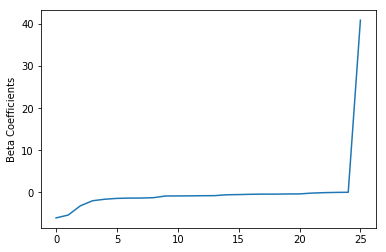

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lr_model.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

# Show the graph. 
plt.show()

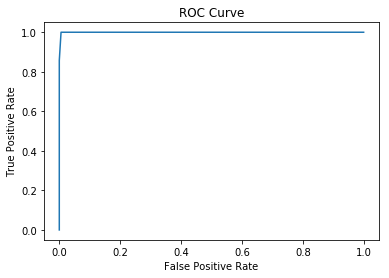

Area Under the Curve: 0.9995893251526904


In [14]:
# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

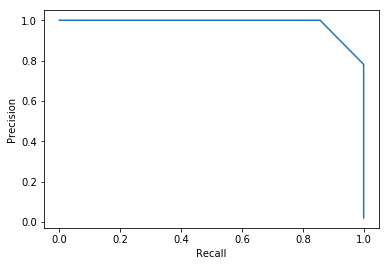

In [15]:
# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [16]:
df2.columns

['ST_CASE',
 'STATE',
 'FATALS',
 'A_CRAINJ',
 'A_REGION',
 'A_RU',
 'A_INTER',
 'A_RELRD',
 'A_INTSEC',
 'A_ROADFC',
 'A_JUNC',
 'A_MANCOL',
 'A_TOD',
 'A_DOW',
 'A_CT',
 'A_LT',
 'A_MC',
 'A_SPCRA',
 'A_PED',
 'A_PED_F',
 'A_PEDAL',
 'A_PEDAL_F',
 'A_ROLL',
 'A_POLPUR',
 'A_POSBAC',
 'A_D15_19',
 'A_D16_19',
 'A_D15_20',
 'A_D16_20',
 'A_D65PLS',
 'A_D21_24',
 'A_D16_24',
 'A_RD',
 'A_HR',
 'A_DIST',
 'A_DROWSY',
 'STATE',
 'VEH_NO',
 'MFACTOR']

In [19]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = ['A_RU','A_REGION','A_INTER','A_RELRD','A_INTSEC',
                'A_ROADFC','A_MANCOL','A_TOD','A_JUNC','A_DOW','A_CT','A_MC','A_LT','A_SPCRA','A_PED','A_ROLL','A_POLPUR','A_POSBAC','A_D15_20',
                'A_D65PLS'
                ,'A_RD',
                'A_HR',
                'A_DIST',
                'A_DROWSY','MFACTOR'], outputCol = 'features')

In [20]:
output = assembler.transform(df2)

In [21]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol = 'A_CRAINJ', outputCol = 'A_CRAINJIndex')
outputFixed = indexer.fit(output).transform(output)
outputFixed.printSchema()

root
 |-- ST_CASE: integer (nullable = true)
 |-- STATE: integer (nullable = true)
 |-- FATALS: integer (nullable = true)
 |-- A_CRAINJ: integer (nullable = true)
 |-- A_REGION: integer (nullable = true)
 |-- A_RU: integer (nullable = true)
 |-- A_INTER: integer (nullable = true)
 |-- A_RELRD: integer (nullable = true)
 |-- A_INTSEC: integer (nullable = true)
 |-- A_ROADFC: integer (nullable = true)
 |-- A_JUNC: integer (nullable = true)
 |-- A_MANCOL: integer (nullable = true)
 |-- A_TOD: integer (nullable = true)
 |-- A_DOW: integer (nullable = true)
 |-- A_CT: integer (nullable = true)
 |-- A_LT: integer (nullable = true)
 |-- A_MC: integer (nullable = true)
 |-- A_SPCRA: integer (nullable = true)
 |-- A_PED: integer (nullable = true)
 |-- A_PED_F: integer (nullable = true)
 |-- A_PEDAL: integer (nullable = true)
 |-- A_PEDAL_F: integer (nullable = true)
 |-- A_ROLL: integer (nullable = true)
 |-- A_POLPUR: integer (nullable = true)
 |-- A_POSBAC: integer (nullable = true)
 |-- A_D1

In [22]:
final_df = outputFixed.select('features', 'A_CRAINJIndex')
final_df.show(3)

+--------------------+-------------+
|            features|A_CRAINJIndex|
+--------------------+-------------+
|[1.0,4.0,2.0,4.0,...|          0.0|
|[1.0,4.0,1.0,3.0,...|          0.0|
|[1.0,4.0,2.0,4.0,...|          0.0|
+--------------------+-------------+
only showing top 3 rows



In [23]:
train, test = final_df.randomSplit([0.7, 0.3])

In [28]:
from pyspark.ml.classification import (DecisionTreeClassifier, RandomForestClassifier, 
                                      GBTClassifier)
from pyspark.ml import Pipeline

dt = DecisionTreeClassifier(labelCol = 'A_CRAINJIndex', featuresCol = 'features')
rf = RandomForestClassifier(labelCol = 'A_CRAINJIndex', featuresCol = 'features')
gb = GBTClassifier(labelCol = 'A_CRAINJIndex', featuresCol = 'features')

In [29]:
dt_model = dt.fit(train)
rf_model = rf.fit(train)
gb_model = gb.fit(train)

In [42]:
dt_predictions = dt_model.transform(test)
rf_predictions = rf_model.transform(test)
gb_predictions = gb_model.transform(test)

In [43]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

binary_evaluator = BinaryClassificationEvaluator(labelCol = 'A_CRAINJIndex')

print('Decision Tree:', binary_evaluator.evaluate(dt_predictions))

Decision Tree: 0.8958832963819048


In [44]:
print('Random Forest:' , binary_evaluator.evaluate(rf_predictions))

Random Forest: 0.9045087032407163


In [ ]:
print('Gradient-boosted Trees:', binary_evaluator.evaluate(gb_predictions))

In [39]:
multi_evaluator.getMetricName()

'accuracy'

In [38]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'A_CRAINJIndex', metricName = 'accuracy')
print('Decision Tree Accu:', multi_evaluator.evaluate(dt_predictions))

Decision Tree Accu: 0.9797451374916164


In [40]:
print('Random Forest Accu:', multi_evaluator.evaluate(rf_predictions))

Random Forest Accu: 0.9805499664654594


In [41]:
print('Gradient-boosted Trees Accu:', multi_evaluator.evaluate(gb_predictions))

Gradient-boosted Trees Accu: 0.9800134138162307
